<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/high_dimensions_pairwise_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo: Distance Concentration in High Dimensions

We will empirically observe how, as the ambient dimension \(n\) grows, the ratio between the farthest and nearest pairwise distances in a random cloud of points tends toward 1—making “nearest” and “farthest” almost indistinguishable.

The code simulates random point clouds in different dimensions, calculates the range of pairwise distances, and shows how this range shrinks relative to the minimum distance as the dimension increases, illustrating the phenomenon of distance concentration.

### Steps

1. For each chosen dimension $\(n\in\{2,10,50,200\}\)$:
   - Sample $\(N=1000\)$ points from the standard normal distribution in $\(\mathbb{R}^n\)$.
   - Compute the full pairwise Euclidean distance matrix.
   - Extract the minimum and maximum off‐diagonal distances.
   - Compute the ratio
     $  \text{ratio}(n) \;=\; \frac{\max d - \min d}{\min d}$
     
2. Print the ratio for each $\(n\)$.  You should see it shrink as $\(n\)$ increases.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

Dimension   2: ratio = 1931.6849
Dimension  10: ratio = 9.7102
Dimension  50: ratio = 1.6736
Dimension 200: ratio = 0.5551


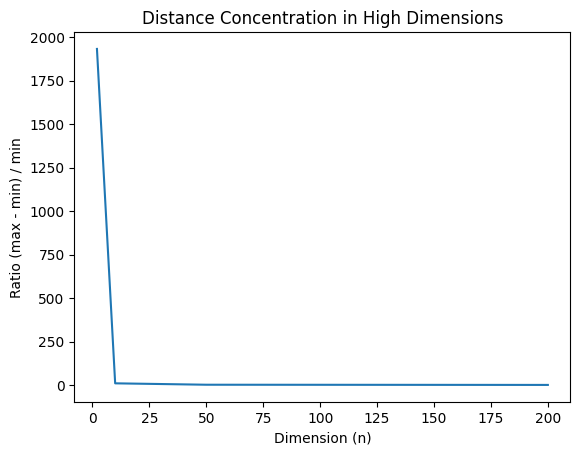

In [7]:
def distance_ratio(n, N=1000, seed=0):
    """
    Sample N points in R^n, compute all pairwise distances,
    and return (max - min) / min for the off-diagonal distances.
    """
    rng = np.random.default_rng(seed)
    X = rng.standard_normal(size=(N, n))
    # Compute squared distances in a vectorized way
    # (we will take sqrt later)
    sum_sq = np.sum(X**2, axis=1, keepdims=True)
    D2 = sum_sq + sum_sq.T - 2 * X.dot(X.T)
    # Numerical errors can produce tiny negatives—clip to zero
    D2 = np.clip(D2, 0, None)
    # Get upper‐triangle indices (i<j)
    i, j = np.triu_indices(N, k=1)
    d = np.sqrt(D2[i, j])
    d_min, d_max = d.min(), d.max()
    return (d_max - d_min) / d_min

# Run for various dimensions and store the ratios
dimensions = [2, 10, 50, 200]
ratios = []
for n in dimensions:
    ratio = distance_ratio(n)
    ratios.append(ratio)
    print(f"Dimension {n:3d}: ratio = {ratio:.4f}")

plt.figure()
plt.plot(dimensions, ratios)
plt.xlabel("Dimension (n)")
plt.ylabel("Ratio (max - min) / min")
plt.title("Distance Concentration in High Dimensions")
plt.show()